### Работа с XFOIL через Python

In [1]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

In [2]:
Re = 250000
M = 0.0
ncr = 12
it = 1000
alpha_min = -3
alpha_max = 13
alpha_step = 0.2

Запись исполнительного файла .in:

In [3]:
file_path = "D:\Desktop\XFoil\\"
polar_path = "D:\Desktop\Физтех\Aerokitties\Tucan NG\Крыло\\"
foil_name = "SG 6042"
sep = '_'

command_file=open(file_path + 'commands.in','w')
command_file.write('load ' + file_path + foil_name + '.txt\n\
ppar\n\
n 200\n\
\n\
\n\
oper\n\
visc ' + str(Re) + '\n\
M ' + str(M) + '\n\
iter' + str(it) + '\n\
vpar\n\
n ' + str(ncr) + '\n\
\n\
pacc\n'
+ polar_path + foil_name + '_Re' + str(Re) + '_n' + str(ncr) + '.dat\n\
\n\
aseq -0.2 -2 0.2\n\
\n\
\n\
quit\n')
command_file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Desktop\\XFoil\\commands.in'

In [4]:
sep=os.path.sep
xfoil_path = file_path
run_xfoil_command = xfoil_path + 'xfoil < ' + file_path + \
'commands.in'
os.system(run_xfoil_command)

1

In [6]:
aero_data_file = open(file_path + 'polar.dat', 'r')
lines = aero_data_file.readlines()
aero_data_file.close()
#delete Xfoil output file ready for next Xfoil run
#os.system('del ' + file_path + 'polar.dat')
#Linux/OSX: os.system('rm -f ' + file_path + 'polar.dat')
#alpha = float(lines[-1][2: 8])
cl = np.array(lines[12:-1][11: 17])
#cd = float(lines[12:-1][20: 27])

In [7]:
cl

array(['   2.400   0.7773   0.01077   0.00584  -0.1197   0.8202   1.0000\n',
       '   2.600   0.7995   0.01067   0.00572  -0.1193   0.8111   1.0000\n',
       '   2.800   0.8237   0.01052   0.00554  -0.1192   0.8024   1.0000\n',
       '   3.000   0.8491   0.01035   0.00534  -0.1193   0.7935   1.0000\n',
       '   3.200   0.8699   0.01026   0.00523  -0.1186   0.7819   1.0000\n',
       '   3.400   0.8908   0.01018   0.00512  -0.1180   0.7700   1.0000\n'],
      dtype='<U65')

Анализ качества горизонтального полета от скорости для SG604x

In [5]:
def ba (Sw, AR):
    return (Sw / AR) ** 0.5

def Re(V, l, nu = 1.5 * 10 ** (-5)):
    return V * l / nu

def CL_required (V, S, m, rho = 1.22):
    return (2 * m * 9.81 / (rho * V ** 2 * S))

def CDi (CL, AR, e = 0.9):
    return (CL ** 2 / (math.pi * e * AR))

In [8]:
XFoil_command_CL(15, 7, 0.25, 0.8, foil1_path)

0

In [7]:
foil1_path = "D:\\YURA\Aerokitties\\OptFALT\\"
foil1_name = "SD7037"
path = ''

def XFoil_command_CL(V, AR, Sw, m, XFoil_path, it = 1000, M = 0.0, work_path = foil1_path, foil_name = foil1_name):
    command_file=open(XFoil_path + 'commands.in','w')
    command_file.write('load ' + work_path + foil_name + '.dat'+'\n'\
    + foil_name + '\n\
    panel\n\
    oper\n\
    visc ' + str(Re(V, ba(Sw, AR))) + '\n\
    M ' + str(M) + '\n\
    type 1\n\
    vpar\n\
    n ' + str(ncr) + '\n\
    \n\
    iter\n' + str(it) + '\n\
    pacc\n'\
    + work_path + 'polar.dat\n\
    \n\
    cl ' + str(CL_required(V, Sw, m)) +'\n\
    \n\
    \n\
    quit\n')
    command_file.close()
    return 0

def XFoil_run(file_path, xfoil_path):
    sep=os.path.sep
    run_xfoil_command = xfoil_path + 'xfoil < ' + file_path + \
    'commands.in'
    os.system(run_xfoil_command)
    return 0
    
def XFoil_read(file_path = path, data_path = path):
    aero_data_file = open(file_path + 'polar.dat', 'r')
    lines = aero_data_file.readlines()
    aero_data_file.close()
    #delete Xfoil output file ready for next Xfoil run
    os.system('del ' + file_path + 'polar.dat')
    #Linux/OSX: os.system('rm -f ' + file_path + 'polar.dat')
    alpha = float(lines[-1][2: 8])
    cl = float(lines[-1][11: 17])
    cd = float(lines[-1][20: 27])
    return [alpha, cl, cd]
    
def K_V_solver(V, AR, Sw, m):
    polar = np.array([])
    for v in V:
        XFoil_command_CL(v, AR, Sw, m)
        XFoil_run()
        polar = np.append(polar, [[XFoil_read()]])
        print(v)
    polar = polar.reshape(polar.size // 3, 3)
    return polar

In [10]:
wing_area = 0.353
TOM = 5. # Взлетная масса
TOV = 12 # м/с скорость отрыва

In [9]:
AR = 9.
polar = K_V_solver(V, AR, wing_area, TOM)

NameError: name 'V' is not defined

In [14]:
polar    

array([[6.332  , 0.8898 , 0.01524],
       [4.667  , 0.7882 , 0.01018],
       [3.493  , 0.7031 , 0.00911],
       [2.416  , 0.631  , 0.00938],
       [1.542  , 0.5695 , 0.00988],
       [1.209  , 0.5165 , 0.01007],
       [1.026  , 0.4706 , 0.01003],
       [0.865  , 0.4306 , 0.00992],
       [0.735  , 0.3955 , 0.00972],
       [0.639  , 0.3645 , 0.00949],
       [0.509  , 0.337  , 0.00927],
       [0.424  , 0.3125 , 0.009  ],
       [0.342  , 0.2905 , 0.00872],
       [0.22   , 0.2709 , 0.0085 ],
       [0.109  , 0.2531 , 0.00827]])

In [15]:
POLAR = pd.DataFrame(polar, columns = ['alpha', 'CL', 'CD'])
POLAR.insert(0, "V", V)
POLAR.insert(4, "CDi", CDi(POLAR.CL, AR))
POLAR.insert(5, "K", POLAR.CL / (POLAR.CD + POLAR.CDi))

In [16]:
POLAR

In [18]:
POLAR.to_csv("Pelikan5_S3.txt")

In [31]:
POLAR = pd.DataFrame(polar, columns = ['alpha', 'CL', 'CD'])
POLAR.insert(0, "V", V)
POLAR.insert(4, "CDi", CDi(POLAR.CL, AR))
POLAR.insert(5, "K", POLAR.CL / (POLAR.CD + POLAR.CDi))

In [32]:
from scipy.interpolate import make_interp_spline, BSpline
#define x as 200 equally spaced values between the min and max of original x 
Vnew = np.linspace(POLAR.V.min(), POLAR.V.max(), 50) 

#define spline with degree k=7
spl = make_interp_spline(POLAR.V, POLAR.K, k=2)
K_smooth = spl(Vnew)

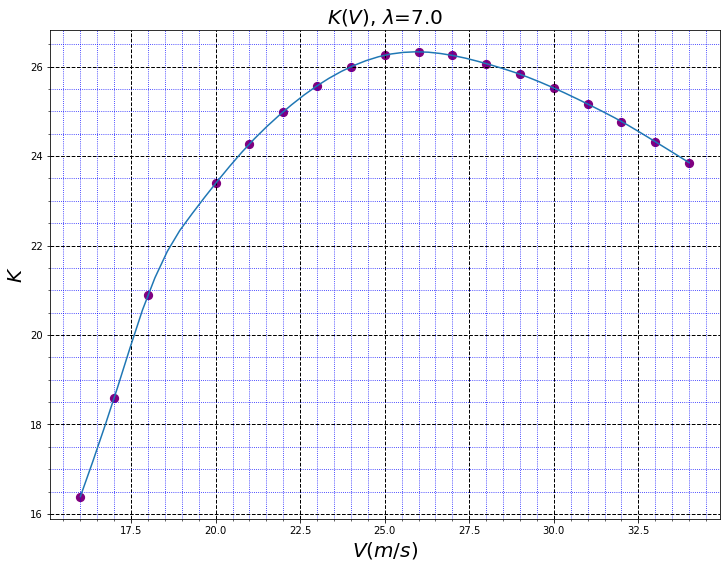

In [33]:
fig, ax = plt.subplots(figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major', color = 'k',linestyle='--', linewidth = 1)
plt.grid(which='minor', color = 'b', linestyle = ':')

plt.title("$K(V)$, $\lambda$={0}".format(AR) , fontsize = "20")
plt.xlabel("$V(m/s)$", fontsize = "20")
plt.ylabel("$K$", fontsize = "20")
# верхние четыре обязательные строчки - общие параметры графика, присутсутвуют везде где строится график, каких-либо данных не содержат
plt.scatter(POLAR.V, POLAR.K, c='purple',s=60,linewidth=1.5)
plt.plot(Vnew, K_smooth)
#plt.savefig("K_alpha_V14.jpg")

In [12]:
V = np.linspace(16, 30, 15)
#V = np.delete(V, 16)
V

array([16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30.])

In [88]:
AR = np.linspace(6., 11., 6)
data = []
i = 0
for lamb in AR:
    polar = K_V_solver(V, lamb, wing_area, TOM)
    POLAR = pd.DataFrame(polar, columns = ['alpha', 'CL', 'CD'])
    POLAR.insert(0, "V", V)
    POLAR.insert(4, "CDi", CDi(POLAR.CL, lamb))
    POLAR.insert(5, "K", POLAR.CL / (POLAR.CD + POLAR.CDi))
    data.append(POLAR)

16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0


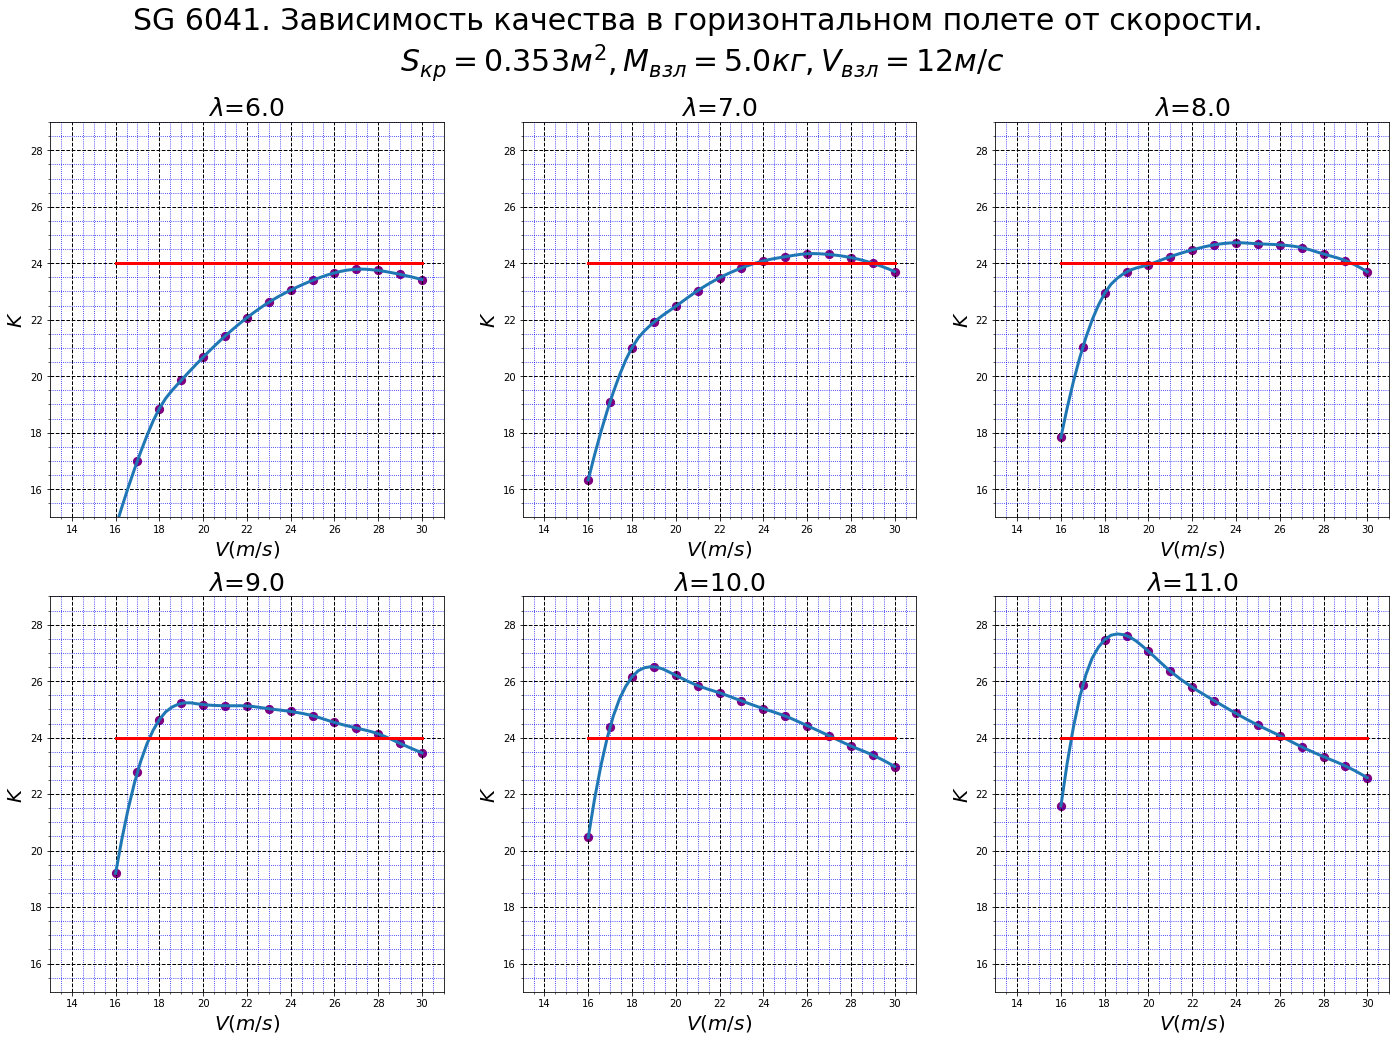

In [97]:
Vnew = np.linspace(data[0].V.min(), data[0].V.max(), 50) 

plt.figure(figsize=(24, 16))
title = "SG 6041. Зависимость качества в горизонтальном полете от скорости.\n $ S_{кр} = $" + str(wing_area) + "$ м^2, M_{взл} = $" + str(TOM) + "$ кг, V_{взл} = $" + str(TOV) + "$ м/с$"
plt.suptitle(title, fontsize=30)

for j in range(6):
    plt.subplot(2,3,j + 1)
    plt.minorticks_on()
    plt.grid(which='major', color = 'k',linestyle='--', linewidth = 1)
    plt.grid(which='minor', color = 'b', linestyle = ':')

    plt.title("$\lambda$={0}".format(AR[j]) , fontsize = "25")
    plt.xlabel("$V(m/s)$", fontsize = "20")
    plt.xlim([13, 31])
    plt.ylabel("$K$", fontsize = "20")
    plt.ylim(15, 29)
    
    spl = make_interp_spline(data[j].V, data[j].K, k=2)
    K_smooth = spl(Vnew)
    
    plt.scatter(data[j].V, data[j].K, c='purple',s=60,linewidth=1.5)
    plt.plot(Vnew, K_smooth, linewidth = 3)
    plt.plot(Vnew, np.ones_like(Vnew) * 24., linewidth = 3, c = 'r')
    plt.savefig("SG6041_S3_AR_var.jpg")